# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods
## Location Attica

In [1]:
!pip install beautifulsoup4
!pip install geocoder
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geocoder --yes
! pip install pyexcel pyexcel-xlsx
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import numpy as np 
import pandas as pd
import json 
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim 
import geocoder
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize 
print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


### 1. Create a DataFrame with all Municipalities in Attica from the Wikipedia -Data Wrangling

In [3]:

data = requests.get("https://commons.wikimedia.org/wiki/Category:Municipalities_in_Attica").text



In [4]:

so = BeautifulSoup(data, 'html.parser')

In [5]:

# create a list to store neighborhood data
neighborhoodList = []

In [6]:
for row in so.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [7]:

# Create a new DataFrame from the Wikepedia
attica_df = pd.DataFrame({"Neighborhood": neighborhoodList})

attica_df.head()



attica_df=attica_df.drop(attica_df.index[0:2])
attica_df=attica_df.reset_index(drop=True)
attica_df

,Neighborhood
0,"► Acharnes‎ (13 C, 5 F)"
1,"► Agia Paraskevi‎ (1 C, 19 F)"
2,► Agia Varvara (Attica)‎ (3 C)
3,"► Agios Dimitrios (Attica)‎ (2 C, 5 F)"
4,"► Aigaleo‎ (2 C, 35 F)"
5,"► Alimos‎ (3 C, 54 F)"
6,"► Aspropyrgos‎ (2 C, 6 F)"
7,"► Athens‎ (40 C, 2 P, 175 F)"
8,"► Chalandri‎ (20 C, 13 F)"
9,"► Dafni-Ymittos‎ (1 C, 13 F)"


### 2. Get Latitude and Longitude for Municipalities in Attica-Data Wrangling

In [8]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Athens, Greece'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in attica_df["Neighborhood"].tolist() ]
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [10]:

# merge the coordinates into the original dataframe
attica_df['Latitude'] = df_coords['Latitude']
attica_df['Longitude'] = df_coords['Longitude']

In [11]:

# check the neighborhoods and the coordinates
print(attica_df.shape)
attica_df




(53, 3)


,Neighborhood,Latitude,Longitude
0,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842
1,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845
2,► Agia Varvara (Attica)‎ (3 C),37.983330,23.666670
3,"► Agios Dimitrios (Attica)‎ (2 C, 5 F)",37.979891,23.726212
4,"► Aigaleo‎ (2 C, 35 F)",37.977831,23.708156
5,"► Alimos‎ (3 C, 54 F)",37.998907,23.784065
6,"► Aspropyrgos‎ (2 C, 6 F)",38.059010,23.588270
7,"► Athens‎ (40 C, 2 P, 175 F)",37.976140,23.736400
8,"► Chalandri‎ (20 C, 13 F)",38.015012,23.816672
9,"► Dafni-Ymittos‎ (1 C, 13 F)",37.949480,23.726740


In [12]:
# save the DataFrame as CSV file
attica_df.to_csv("attica_df.csv", index=False)

### 3. Map of Municipalities in Attica 

In [13]:

# get the coordinates of Attica
address = 'Athens, Greece'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens, Greece {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Athens, Greece 37.9841493, 23.7279843.


In [14]:
# Map-Municipalities of Attica
map_attica = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(attica_df['Latitude'], attica_df['Longitude'], attica_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_attica)  
    
map_attica

In [15]:

map_attica.save('map_attica.html')

### 4. Get the Types of Businesses in Attica from Foursquare-Data Wrangling

In [16]:

CLIENT_ID = '3PNK0GKKTSTCPED4CGWPOYJKPRIH1AU4TVV02MSR1Y0YORKK' # your Foursquare ID
CLIENT_SECRET = 'BRY1SPW124OVEZ213PCG0JPAVEJYPYYFD2TTA2O23GHUXNQJ' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: 3PNK0GKKTSTCPED4CGWPOYJKPRIH1AU4TVV02MSR1Y0YORKK
CLIENT_SECRET:BRY1SPW124OVEZ213PCG0JPAVEJYPYYFD2TTA2O23GHUXNQJ


In [17]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(attica_df['Latitude'], attica_df['Longitude'], attica_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(4855)

(4855, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Best Friends,38.109290,23.771135,Café
1,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Κλειστό Γυμναστήριο Ολυμπιακού Χωριού,38.109364,23.771130,Basketball Court
2,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Αθλητικές Εγκαταστάσεις Ολυμπιακού Χωριού,38.109312,23.771132,Recreation Center
3,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Tatoi's Forest (Δάσος Τατοΐου),38.109342,23.771123,Trail
4,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Πιρουνάκια Grill,38.119735,23.748390,Souvlaki Shop
...,...,...,...,...,...,...,...
4850,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Kopa Arena,38.036430,23.715132,Soccer Field
4851,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Ilion Football Club,38.036834,23.714041,Soccer Field
4852,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Rimini,38.036546,23.713150,Food
4853,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Εύγευστον,38.066303,23.712910,Souvlaki Shop


In [21]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))


There are 255 uniques categories.


In [22]:

# print out the list of categories
venues_df['VenueCategory']

0                    Café
1        Basketball Court
2       Recreation Center
3                   Trail
4           Souvlaki Shop
              ...        
4850         Soccer Field
4851         Soccer Field
4852                 Food
4853        Souvlaki Shop
4854                Plaza
Name: VenueCategory, Length: 4855, dtype: object

In [23]:
venues_df

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Best Friends,38.109290,23.771135,Café
1,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Κλειστό Γυμναστήριο Ολυμπιακού Χωριού,38.109364,23.771130,Basketball Court
2,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Αθλητικές Εγκαταστάσεις Ολυμπιακού Χωριού,38.109312,23.771132,Recreation Center
3,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Tatoi's Forest (Δάσος Τατοΐου),38.109342,23.771123,Trail
4,"► Acharnes‎ (13 C, 5 F)",38.114148,23.769842,Πιρουνάκια Grill,38.119735,23.748390,Souvlaki Shop
...,...,...,...,...,...,...,...
4850,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Kopa Arena,38.036430,23.715132,Soccer Field
4851,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Ilion Football Club,38.036834,23.714041,Soccer Field
4852,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Rimini,38.036546,23.713150,Food
4853,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Εύγευστον,38.066303,23.712910,Souvlaki Shop


In [24]:
venues_df['VenueCategory'].value_counts()[150:250]

Daycare                 3
Boat or Ferry           3
Trail                   3
Office                  3
Lingerie Store          3
                       ..
Carpet Store            1
Department Store        1
Airport Food Court      1
Food                    1
Arts & Entertainment    1
Name: VenueCategory, Length: 100, dtype: int64

In [25]:
# create a dataframe with frequency of all venues at Attica
Attica_Venuesfrequency = venues_df['VenueCategory'].value_counts()[0:253].to_frame(name='frequency')
Attica_Venuesfrequency=Attica_Venuesfrequency.reset_index()

Attica_Venuesfrequency.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Attica_Venuesfrequency

,Venue_Category,Frequency
0,Café,450
1,Bar,291
2,Coffee Shop,229
3,Greek Restaurant,223
4,Dessert Shop,189
...,...,...
248,Food,1
249,Arts & Entertainment,1
250,Racetrack,1
251,Russian Restaurant,1


In [26]:
Attica_Venuesfrequency.to_csv("Attica_Top10.csv", index=False)

In [27]:

venues_df.to_excel('venues_df.xlsx',index=False)  

### 5. Get the Restaurants in Attica that the entrepreneur is interested

In [28]:
Attica_venuesintrested=venues_df[(venues_df.VenueCategory == 'Mexican Restaurant') | (venues_df.VenueCategory == 'Italian Restaurant')| (venues_df.VenueCategory == 'Middle Eastern Restaurant')
                                 |(venues_df.VenueCategory == 'Greek Restaurant')|(venues_df.VenueCategory == 'Indian Restaurant')|(venues_df.VenueCategory == 'Sushi Restaurant')]
Attica_venuesintrested

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
29,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845,Klimataria (Κληματαριά),38.007392,23.734319,Greek Restaurant
60,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845,Ο Τσαντάκιας,38.017707,23.726888,Greek Restaurant
65,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845,Pame Tsipouro Pame Kafeneio,38.001166,23.738696,Greek Restaurant
71,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845,Το Ρόδι,38.004539,23.715749,Middle Eastern Restaurant
74,"► Agia Paraskevi‎ (1 C, 19 F)",38.006736,23.731845,Γη,37.992385,23.724406,Greek Restaurant
...,...,...,...,...,...,...,...
4804,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Τα Χέρια Της Αφροδίτης,38.045554,23.732131,Greek Restaurant
4806,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Ξηρόμερο,38.043060,23.706366,Greek Restaurant
4808,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Τα Μπινελίκια,38.036515,23.737100,Greek Restaurant
4809,"► Zografou‎ (1 C, 25 F)",38.051164,23.725076,Pasta Bar,38.037256,23.739359,Italian Restaurant


In [29]:
# create a dataframe with frequency of all venues at Attica that enterpreneur is interested
Attica_Venuesfrequency_intrested = Attica_venuesintrested['VenueCategory'].value_counts().to_frame(name='frequency')
Attica_Venuesfrequency_intrested=Attica_Venuesfrequency_intrested.reset_index()

Attica_Venuesfrequency_intrested.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)
Attica_Venuesfrequency_intrested

,VenueCategory,Frequency
0,Greek Restaurant,223
1,Italian Restaurant,44
2,Sushi Restaurant,34
3,Middle Eastern Restaurant,30
4,Indian Restaurant,28
5,Mexican Restaurant,5


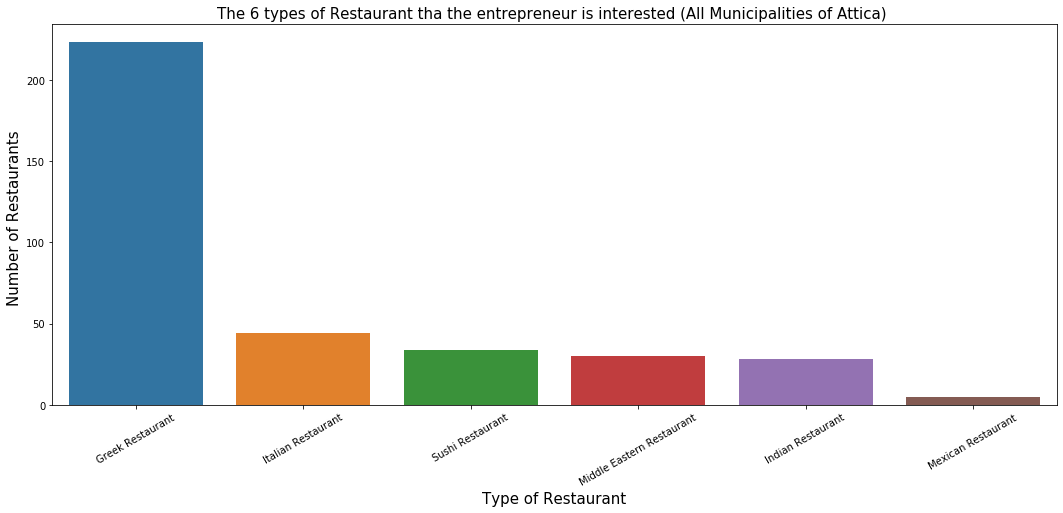

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=Attica_Venuesfrequency_intrested)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('The 6 types of Restaurant tha the entrepreneur is interested (All Municipalities of Attica) ', fontsize=15)
plt.xlabel("Type of Restaurant", fontsize=15)
plt.ylabel ("Number of Restaurants ", fontsize=15)
plt.savefig("The 6 types of Restaurant tha the entrepreneur is interested (All Municipalities of Attica)", dpi=300)
plt.show()

### 6. Get the Restaurants in Attica that the entrepreneur is interested at Municipality  of Kifissia

In [31]:

Municipality_Kifissia=Attica_venuesintrested[Attica_venuesintrested.Neighborhood=='►  Kifissia‎ (18 C,  6 F)']
Municipality_Kifissia=Municipality_Kifissia.reset_index()
Municipality_Kifissia

,index,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,2092,"► Kifissia‎ (18 C, 6 F)",38.061993,23.833013,Βρώμικο Στο Νεκροταφείο,38.066678,23.820754,Greek Restaurant
1,2106,"► Kifissia‎ (18 C, 6 F)",38.061993,23.833013,Πορφύρα,38.051312,23.832310,Greek Restaurant
2,2121,"► Kifissia‎ (18 C, 6 F)",38.061993,23.833013,Koi sushi bar,38.053803,23.841978,Sushi Restaurant
3,2127,"► Kifissia‎ (18 C, 6 F)",38.061993,23.833013,Square Sushi,38.075242,23.819161,Sushi Restaurant
4,2141,"► Kifissia‎ (18 C, 6 F)",38.061993,23.833013,Dos Hermanos,38.070310,23.812923,Mexican Restaurant


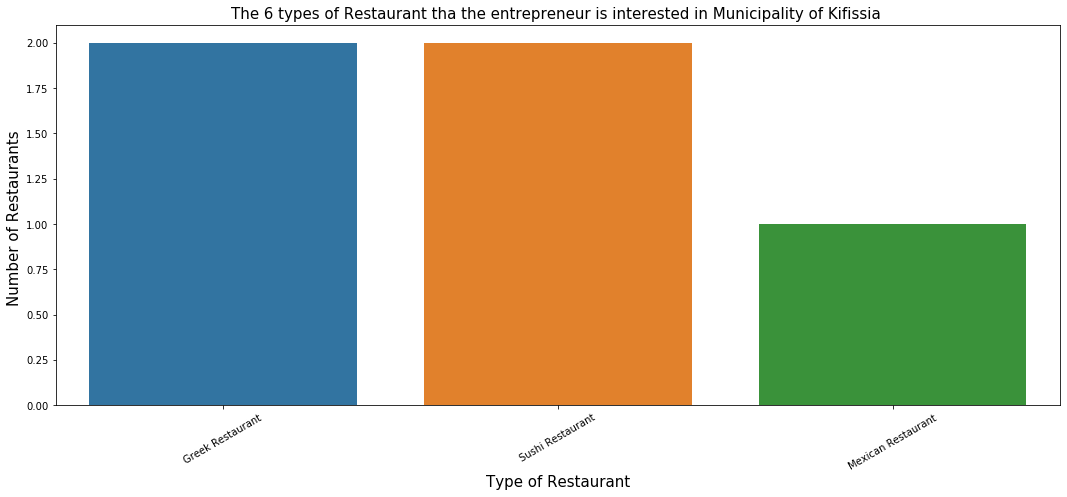

In [32]:
Municipality_Kifissia_frequency = Municipality_Kifissia['VenueCategory'].value_counts().to_frame(name='frequency')
Municipality_Kifissia_frequency=Municipality_Kifissia_frequency.reset_index()

Municipality_Kifissia_frequency.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=Municipality_Kifissia_frequency)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Kifissia ', fontsize=15)
plt.xlabel("Type of Restaurant", fontsize=15)
plt.ylabel ("Number of Restaurants ", fontsize=15)
plt.savefig("The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Kifissia)", dpi=300)
plt.show()

### 6. Get the Restaurants in Attica that the entrepreneur is interested at Municipality of Filadelfeia

In [33]:
Municipality_Filadelfeia=Attica_venuesintrested[Attica_venuesintrested.Neighborhood=='►  Filadelfeia-Chalkidona‎ (2 C,  6 F)']
Municipality_Filadelfeia=Municipality_Filadelfeia.reset_index()
Municipality_Filadelfeia



,index,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,1063,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Ντεμέκ Μεζεδοπωλείο,38.031530,23.736233,Greek Restaurant
1,1074,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Τα Μπινελίκια,38.036515,23.737100,Greek Restaurant
2,1078,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Pasta Bar,38.037256,23.739359,Italian Restaurant
3,1083,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Μπάρμπα Αλέξης,38.033478,23.731168,Middle Eastern Restaurant
4,1092,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Αμπελάκια,38.034033,23.737555,Greek Restaurant
5,1101,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Λεμονόκηπος,38.034653,23.739379,Greek Restaurant
6,1103,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Agavita,38.031986,23.737000,Mexican Restaurant
7,1128,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,"Ψητοπωλειο ""Ο ΣΤΕΦΑΝΟΣ""",38.045138,23.729379,Greek Restaurant
8,1137,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Peperi (Πέπερι),38.043410,23.753155,Greek Restaurant
9,1160,"► Filadelfeia-Chalkidona‎ (2 C, 6 F)",38.03371,23.73771,Βαρκούλες,38.045798,23.753845,Greek Restaurant


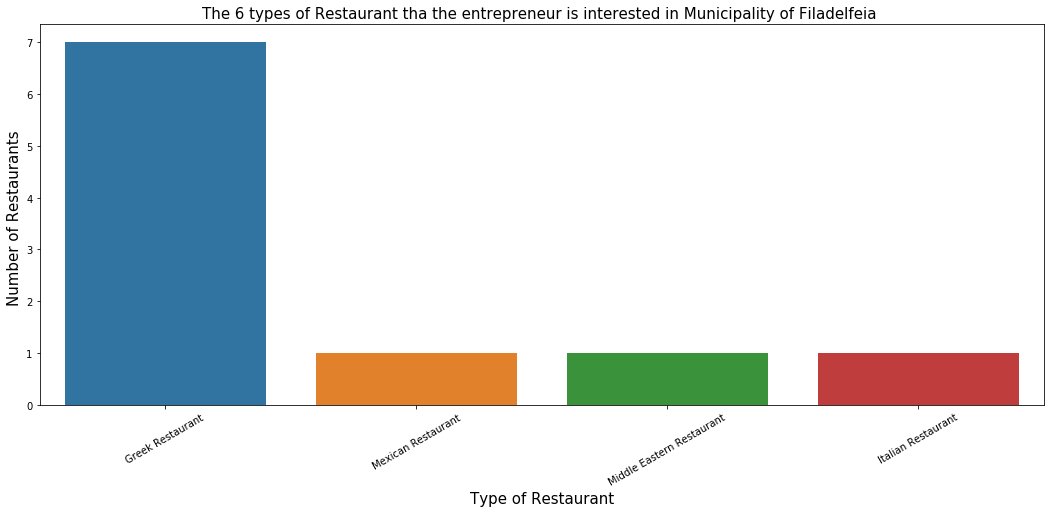

In [34]:
Municipality_Filadelfeia_frequency = Municipality_Filadelfeia['VenueCategory'].value_counts().to_frame(name='frequency')
Municipality_Filadelfeia_frequency=Municipality_Filadelfeia_frequency.reset_index()

Municipality_Filadelfeia_frequency.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=Municipality_Filadelfeia_frequency)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Filadelfeia ', fontsize=15)
plt.xlabel("Type of Restaurant", fontsize=15)
plt.ylabel ("Number of Restaurants ", fontsize=15)
plt.savefig("The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Filadelfeia)", dpi=300)
plt.show()

### 7. Get the Restaurants in Attica that the entrepreneur is interested at Municipality of Maroussi

In [35]:
Municipality_Maroussi=Attica_venuesintrested[Attica_venuesintrested.Neighborhood=='►  Maroussi‎ (15 C,  9 F)']
Municipality_Maroussi=Municipality_Maroussi.reset_index()
Municipality_Maroussi


,index,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,2544,"► Maroussi‎ (15 C, 9 F)",38.05404,23.806,Το Αρχοντικό 1967,38.046470,23.807845,Greek Restaurant
1,2559,"► Maroussi‎ (15 C, 9 F)",38.05404,23.806,Opera Prima,38.053112,23.804214,Italian Restaurant


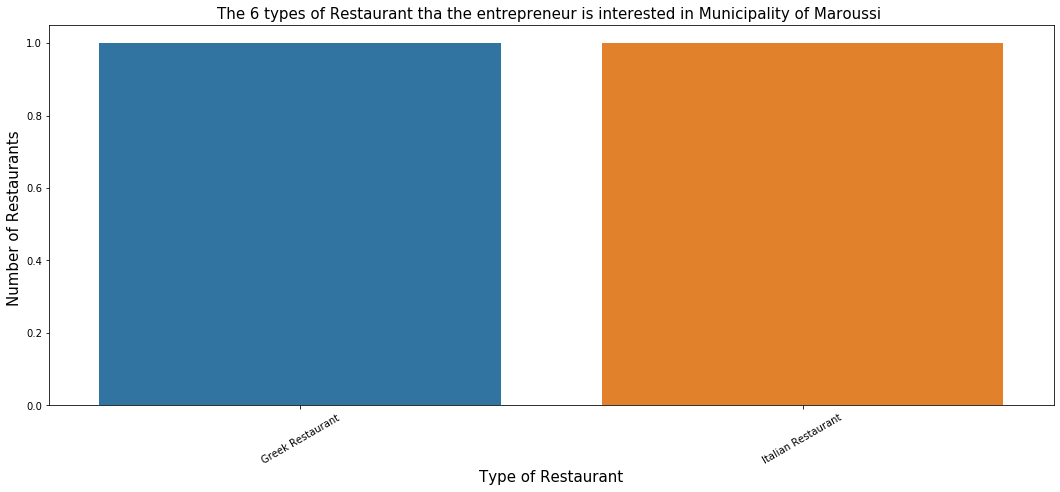

In [36]:
Municipality_Maroussi_frequency = Municipality_Maroussi['VenueCategory'].value_counts().to_frame(name='frequency')
Municipality_Maroussi_frequency=Municipality_Maroussi_frequency.reset_index()

Municipality_Maroussi_frequency.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=Municipality_Maroussi_frequency)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Maroussi ', fontsize=15)
plt.xlabel("Type of Restaurant", fontsize=15)
plt.ylabel ("Number of Restaurants ", fontsize=15)
plt.savefig("The 6 types of Restaurant tha the entrepreneur is interested in Municipality of Maroussi", dpi=300)
plt.show()